# Sentiment Analysis of Fairfax Police Tweets from Twitter (now X)

In this project, sentiment analysis was conducted on tweets from the Fairfax Police. The goal was to evaluate the sentiment expressed in each tweet.. Following the sentiment analysis, tweets were categorized into three distinct groups: **"Important" , "General" and "Non-Important."** This categorization provides valuable insights into the nature of sentiments expressed in the tweets, helping to distinguish between tweets of significance and those of lesser importance.

The following steps were performed from data export to sentiment analysis:


Certainly! Here are the numbered points extracted from the last message:

1. Data Export
2. Data Preprocessing
3. Text Preprocessing
4. Sentiment Analysis
5. Categorization
6. Visualization
7. Analysis and Interpretation

I have skipped the data cleaning part for this project, we will directly start exportimng the cleaned data

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_twitter = pd.read_csv('df_twitter.csv')

In [3]:
df_twitter.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,id,is_quote_tweet,media/0/media_url,reply_count,startUrl,url,user/created_at,user/description,user/fast_followers_count,user/followers_count,user/friends_count,user/listed_count,user/screen_name,user/url,view_count
0,1.666870e+18,2023-06-08T18:02:11.000Z,1,Interested in getting involved in our communit...,FCPD,1.666870e+18,False,https://pbs.twimg.com/media/FyHn0-xWAA4KQF_.jpg,0,https://twitter.com/FairfaxCountyPD,https://twitter.com/FairfaxCountyPD/status/166...,2010-02-24T15:58:49.000Z,Official Fairfax County Police Dept. Report cr...,0,271536,336,828,FairfaxCountyPD,https://t.co/jNDKUD91ho,2515.0
1,1.666840e+18,2023-06-08T16:24:49.000Z,39,Working hard to reduce crashes and make our ro...,FCPD,1.666840e+18,False,https://pbs.twimg.com/media/FyHRiosXsAYMBFG.jpg,4,https://twitter.com/FairfaxCountyPD,https://twitter.com/FairfaxCountyPD/status/166...,2010-02-24T15:58:49.000Z,Official Fairfax County Police Dept. Report cr...,0,271536,336,828,FairfaxCountyPD,https://t.co/jNDKUD91ho,7594.0
2,1.666820e+18,2023-06-08T14:50:10.000Z,37,Protect those who protect you. Move over for f...,FCPD,1.666820e+18,False,https://pbs.twimg.com/ext_tw_video_thumb/16668...,0,https://twitter.com/FairfaxCountyPD,https://twitter.com/FairfaxCountyPD/status/166...,2010-02-24T15:58:49.000Z,Official Fairfax County Police Dept. Report cr...,0,271536,336,828,FairfaxCountyPD,https://t.co/jNDKUD91ho,7170.0
3,1.666510e+18,2023-06-07T22:35:36.000Z,9,UPDATE: Richmond Highway is now open in both d...,FCPD,1.666570e+18,False,NaN,1,https://twitter.com/FairfaxCountyPD,https://twitter.com/FairfaxCountyPD/status/166...,2010-02-24T15:58:49.000Z,Official Fairfax County Police Dept. Report cr...,0,271536,336,828,FairfaxCountyPD,https://t.co/jNDKUD91ho,4767.0
4,1.666570e+18,2023-06-07T22:01:14.000Z,34,Fuego no bueno. Our FAA-certified drone operat...,FCPD,1.666570e+18,False,https://pbs.twimg.com/media/FyDU8kEXoAEm7il.jpg,3,https://twitter.com/FairfaxCountyPD,https://twitter.com/FairfaxCountyPD/status/166...,2010-02-24T15:58:49.000Z,Official Fairfax County Police Dept. Report cr...,0,271536,336,828,FairfaxCountyPD,https://t.co/jNDKUD91ho,9008.0


In [5]:
df_twitter.describe()

,conversation_id,favorite_count,id,reply_count,user/fast_followers_count,user/followers_count,user/friends_count,user/listed_count,view_count
count,8.500000e+02,850.000000,8.500000e+02,850.000000,850.0,850.000000,850.0,850.0,831.000000
mean,1.638755e+18,45.594118,1.638781e+18,5.149412,0.0,271535.810588,336.0,828.0,24373.551143
std,1.927007e+16,85.064868,1.927002e+16,11.169327,0.0,0.392066,0.0,0.0,29957.609722
min,1.602680e+18,0.000000,1.602680e+18,0.000000,0.0,271535.000000,336.0,828.0,2122.000000
25%,1.621690e+18,13.000000,1.621690e+18,1.000000,0.0,271536.000000,336.0,828.0,10448.500000
50%,1.641930e+18,25.000000,1.641930e+18,2.000000,0.0,271536.000000,336.0,828.0,15122.000000
75%,1.656018e+18,50.750000,1.656018e+18,5.000000,0.0,271536.000000,336.0,828.0,26230.500000
max,1.666870e+18,1540.000000,1.666870e+18,166.000000,0.0,271536.000000,336.0,828.0,401889.000000


In [6]:
df_twitter['full_text'].head(n=10)

0    Interested in getting involved in our communit...
1    Working hard to reduce crashes and make our ro...
2    Protect those who protect you. Move over for f...
3    UPDATE: Richmond Highway is now open in both d...
4    Fuego no bueno. Our FAA-certified drone operat...
5    UPDATE: One person has been taken to the hospi...
6    TRAFFIC ALERT: Officers are investigating a ca...
7    RT @fairfaxcounty: Code Red Air Quality Alert ...
8    High visibility enforcement &amp; education re...
9    #FCPD are asking for your help with locating J...
Name: full_text, dtype: object

In [7]:
# Removing the duplicates

df_twitter.drop_duplicates(subset='full_text',inplace=True)

In [8]:
df_twitter.shape

(844, 20)

In [9]:
# Import stopwords and define more additional stopwords that you want to include
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords

additional = ['rt','rts','retweet','fcpd','officer','today','one', 'day', 'fairfax','thanks', 'amp','officers']

swords = set().union(stopwords.words('english'),additional)

In [12]:
print(swords)

{'an', 'not', 'day', "that'll", 'are', 'no', 'until', 'theirs', "you'll", 'against', "you'd", 'when', 'it', 'your', "couldn't", 'can', 'own', 'we', 'nor', 'below', 'who', 'while', 'very', 'has', 'of', 'i', 'why', 'each', 'what', 'haven', 'they', 'isn', 'rts', 'him', 'doesn', 'the', 'hadn', 'or', 'officer', 'yours', "won't", 'their', 'once', "mustn't", "wasn't", "weren't", 'wouldn', 'off', 'mustn', 'herself', 'them', 'had', 'into', "you've", 'am', 's', "hadn't", 'during', 'and', 'whom', 'aren', 'today', 't', 'wasn', 'having', "needn't", 'fcpd', 'couldn', 'a', "shan't", 'yourselves', 'will', 'above', 'ourselves', 'd', 'hasn', 'where', 'she', "aren't", "hasn't", 'that', 'mightn', 'one', 'myself', "she's", 'too', 'did', 're', 'more', 'is', 'out', 'didn', "don't", 'again', 'here', 've', "wouldn't", 'how', 'most', 'those', "mightn't", 'been', 'to', 'weren', 'from', 'officers', 'then', 'now', 'on', "haven't", 'under', 'm', 'just', 'by', 'so', 'being', 'such', 'rt', 'thanks', 'be', 'have', 'bo

In [13]:
df_twitter['processed_text'] = df_twitter['full_text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

<ipython-input-13-7b734d7abe87>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twitter['processed_text'] = df_twitter['full_text'].str.lower()\


In [14]:
# Removing more unncessary similar words

from nltk.stem import PorterStemmer

ps = PorterStemmer()
df_twitter['stemmed'] = df_twitter['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])

In [15]:
df_twitter['processed_text']

0      [interested, getting, involved, community, wat...
1      [working, hard, reduce, crashes, make, roads, ...
2      [protect, protect, move, first, responders, em...
3      [update, richmond, highway, open, directions, ...
4      [fuego, bueno, faa, certified, drone, operator...
                             ...                        
845    [santa, friends, fun, filled, visiting, school...
846    [everyone, deserves, celebrate, holiday, seaso...
847              [driver, charged, nov, 8, fatal, crash]
848    [arrested, dec, 1, lamont, marable, arrested, ...
849     [pedestrian, nov, 15, crash, succumbs, injuries]
Name: processed_text, Length: 844, dtype: object

In [16]:
# # Creating word_cloud with text as argument in .generate() method

from wordcloud import WordCloud

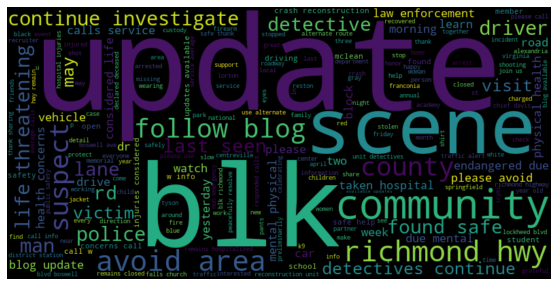

In [18]:
# We need strings for wordcloud. Since the processed_text column is a list we'll convert it into strings

text = ' '.join(df_twitter['processed_text'].apply(lambda x: ' '.join(x)))

# Define wordcloud

wordcloud = WordCloud(width=800, height=400).generate(text)

# Plooting the words

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

It can be said that the FCPD tweets contains emergency updates, crime news and general information regardinf law

In [19]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')

sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_twitter['sentiment_score'] = df_twitter['processed_text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] 
                                                                  for i in word_tokenize( ' '.join(x) )]) )

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shirishpandagare/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
df_twitter[['processed_text','sentiment_score']].head(n=50)

,processed_text,sentiment_score
0,"[interested, getting, involved, community, wat...",0.4019
1,"[working, hard, reduce, crashes, make, roads, ...",-0.0630
2,"[protect, protect, move, first, responders, em...",0.3818
3,"[update, richmond, highway, open, directions, ...",0.4939
4,"[fuego, bueno, faa, certified, drone, operator...",-0.8716
5,"[update, person, taken, hospital, life, threat...",-1.3305
6,"[traffic, alert, investigating, car, crash, in...",-0.5604
7,"[code, red, air, quality, alert, due, wildfire...",0.5920
8,"[high, visibility, enforcement, education, rem...",0.3818
9,"[asking, help, locating, javon, reid, wanted, ...",-0.4804


In [22]:
df_twitter['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    422
 1    183
-1    175
 2     32
-2     18
 3     13
-4      1
Name: sentiment_score, dtype: int64

We can classify the Fairfax police updates into 3 categories:

1. Positive Tweets : Sentiment score > 0 are positive
2. Neutral Tweets : Sentiment score = 0 are neutral
3. Negative Tweets : Sentiment score < 0 are negative

In [24]:
# Define a function to calculate sentiment score

def calculate_sentiment_score(sentiment):
    if sentiment < 0:
        return 'negative'
    elif sentiment > 0:
        return 'positive'
    else:
        return 'neutral'

# Create a new column for category tags
df_twitter['category'] = ''

# Calculate sentiment scores and assign category tags
for index, row in df_twitter.iterrows():
    sentiment_score = row['sentiment_score']
    category = calculate_sentiment_score(sentiment_score)
    df_twitter.at[index, 'category'] = category

# Print the counts of tweets in each category
print(df_twitter['category'].value_counts())

positive    373
negative    347
neutral     124
Name: category, dtype: int64


In [25]:
df_twitter[['processed_text','sentiment_score','category']]

,processed_text,sentiment_score,category
0,"[interested, getting, involved, community, wat...",0.4019,positive
1,"[working, hard, reduce, crashes, make, roads, ...",-0.0630,negative
2,"[protect, protect, move, first, responders, em...",0.3818,positive
3,"[update, richmond, highway, open, directions, ...",0.4939,positive
4,"[fuego, bueno, faa, certified, drone, operator...",-0.8716,negative
...,...,...,...
845,"[santa, friends, fun, filled, visiting, school...",1.3485,positive
846,"[everyone, deserves, celebrate, holiday, seaso...",1.0626,positive
847,"[driver, charged, nov, 8, fatal, crash]",-1.1465,negative
848,"[arrested, dec, 1, lamont, marable, arrested, ...",-0.9534,negative


In [26]:
df_senti = df_twitter[['processed_text','sentiment_score','category']]

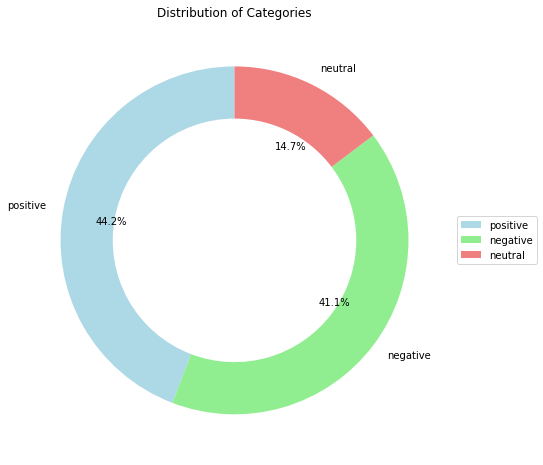

In [28]:
category_counts = df_senti['category'].value_counts()

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, 
                                   colors=['lightblue', 'lightgreen', 'lightcoral'], wedgeprops=dict(width=0.3))

# Adjusting the position of labels
plt.legend(patches, category_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Displaying the percentage labels outside the pie chart
for autotext in autotexts:
    autotext.set_position((1.2 * autotext.get_position()[0], autotext.get_position()[1]))

plt.title('Distribution of Categories')
plt.show()

This is a very superficial level identifying sentiments through tweets. However, a much more detailed analysis is required to identify accurately.